In [1]:
#Load your files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/MyDrive/'Colab Notebooks'/INM706/CW/Trial_1
!ls

/content/drive/MyDrive/Colab Notebooks/INM706/CW/Trial_1
'IMDB Dataset.csv'   INM706_Lab7_Bert_Cls.ipynb  'Sentimental LSTM.ipynb'


In [9]:
import nltk
nltk.download('stopwords')
nltk.download('reuters')
nltk.download('punkt')

In [ ]:
import numpy as np
import pandas as pd

# 1. LOAD THE TRAINING TEXT

In [42]:
train_data=pd.read_csv('IMDB Dataset.csv')
reviews=train_data['review']
labels=train_data['sentiment']
labels = labels.replace({'negative': 0, 'positive': 1})


y_test=list()
print(labels)
labels = np.array(labels)
print(labels)

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64
[1 1 1 ... 0 0 0]


#  2. TEXT PRE-PROCESSING

In [29]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [14]:
appos = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not"
}

In [30]:
from string import punctuation
def review_formatting(reviews):
    all_reviews=list()
    for text in reviews:
        lower_case = text.lower()
        words = lower_case.split()
        reformed = [appos[word] if word in appos else word for word in words]
        reformed_test=list()
        for word in reformed:
            if word not in stop_words:
                reformed_test.append(word)
        reformed = " ".join(reformed_test)
        punct_text = "".join([ch for ch in reformed if ch not in punctuation])
        all_reviews.append(punct_text)
    all_text = " ".join(all_reviews)
    all_words = all_text.split()
    return all_reviews, all_words

In [43]:
from collections import Counter
# Count all the words using Counter Method
all_reviews, all_words=review_formatting(reviews)
count_words = Counter(all_words)
total_words=len(all_words)
sorted_words=count_words.most_common(total_words)
vocab_to_int={w:i+1 for i,(w,c) in enumerate(sorted_words)}

In [32]:
print(total_words)
print(count_words)

Output hidden; open in https://colab.research.google.com to view.

In [19]:
def encode_reviews(reviews):
    """
    encode_reviews function will encodes review in to array of numbers
    """
    all_reviews=list()
    for text in reviews:
        text = text.lower()
        text = "".join([ch for ch in text if ch not in punctuation])
        all_reviews.append(text)
    encoded_reviews=list()
    for review in all_reviews:
        encoded_review=list()
        for word in review.split():
            if word not in vocab_to_int.keys():
                encoded_review.append(0)
            else:
                encoded_review.append(vocab_to_int[word])
        encoded_reviews.append(encoded_review)
    return encoded_reviews

In [20]:
def pad_sequences(encoded_reviews, sequence_length=250):
    '''
    Return features of review_ints, where each review is padded with 0's or truncated to the input seq_length.
    '''
    features=np.zeros((len(encoded_reviews), sequence_length), dtype=int)

    for i, review in enumerate(encoded_reviews):
        review_len=len(review)
        if (review_len<=sequence_length):
            zeros=list(np.zeros(sequence_length-review_len))
            new=zeros+review
        else:
            new=review[:sequence_length]
        features[i,:]=np.array(new)
    return features

In [21]:
def preprocess(reviews):
    """
    This Function will tranform reviews in to model readable form
    """
    formated_reviews, all_words = review_formatting(reviews)
    encoded_reviews=encode_reviews(formated_reviews)
    features=pad_sequences(encoded_reviews, 250)
    return features

# Analyze The Review Length

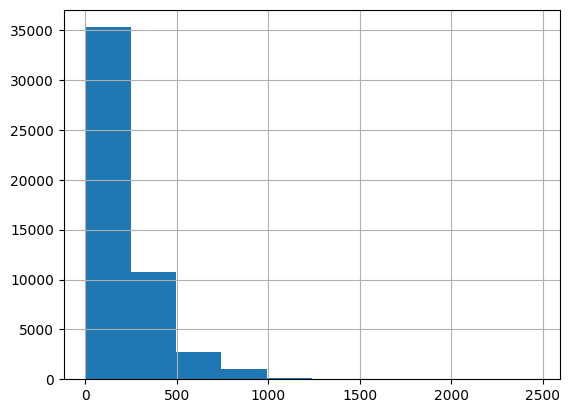

count    50000.000000
mean       230.258240
std        170.663887
min          4.000000
25%        126.000000
50%        172.000000
75%        280.000000
max       2469.000000
dtype: float64

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
encoded_reviews=encode_reviews(reviews)
review_len=[len(encoded_review) for encoded_review in encoded_reviews]
pd.Series(review_len).hist()
plt.show()
pd.Series(review_len).describe()

In [45]:
#split_dataset into 80% training , 10% test and 10% Validation Dataset
features=preprocess(reviews)
train_x=features[:int(0.90*len(features))]
train_y=labels[:int(0.90*len(features))]
valid_x=features[int(0.90*len(features)):]
valid_y=labels[int(0.90*len(features)):]
print(len(train_y), len(valid_y))

45000 5000


In [37]:
print(train_x)
print(train_y)
print(valid_x)
print(valid_y)

[[     0      0      0 ...   1142   3976    419]
 [     0      0      0 ...   1840     18    139]
 [     0      0      0 ...     66     15    252]
 ...
 [     0      0      0 ...   1766   1254     44]
 [     0      0      0 ... 171941      1   1924]
 [     0      0      0 ...     17   1736    108]]
0        1
1        1
2        1
3        0
4        1
        ..
44995    0
44996    1
44997    1
44998    1
44999    0
Name: sentiment, Length: 45000, dtype: int64
[[     0      0      0 ...    297 171943     51]
 [     0      0      0 ...    223   7481   5281]
 [     0      0      0 ...   5956     52    544]
 ...
 [     0      0      0 ...  20896  23640   6021]
 [     0      0      0 ...   4269    632    702]
 [     0      0      0 ...   4199    705      2]]
45000    1
45001    1
45002    0
45003    0
45004    0
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 5000, dtype: int64


In [40]:
import torch
from torch.utils.data import DataLoader, TensorDataset

#create Tensor Dataset
train_data=TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data=TensorDataset(torch.from_numpy(valid_x), torch.from_numpy(valid_y))

#dataloader
batch_size=50
train_loader=DataLoader(train_data, batch_size=batch_size, shuffle=True)
valid_loader=DataLoader(valid_data, batch_size=batch_size, shuffle=True)

TypeError: expected np.ndarray (got Series)

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset



train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())


#create Tensor Dataset
train_data=TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data=TensorDataset(torch.from_numpy(valid_x), torch.from_numpy(valid_y))

batch_size = 32
train_data = TensorDataset(train_seq, train_mask, train_y)

In [ ]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()
print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

In [ ]:
import torch.nn as nn

class SentimentalLSTM(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """
    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers
        """
        super().__init__()
        self.output_size=output_size
        self.n_layers=n_layers
        self.hidden_dim=hidden_dim

        #Embedding and LSTM layers
        self.embedding=nn.Embedding(vocab_size, embedding_dim)
        self.lstm=nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True)

        #dropout layer
        self.dropout=nn.Dropout(0.3)

        #Linear and sigmoid layer
        self.fc1=nn.Linear(hidden_dim, 64)
        self.fc2=nn.Linear(64, 16)
        self.fc3=nn.Linear(16,output_size)
        self.sigmoid=nn.Sigmoid()

    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size=x.size()

        #Embadding and LSTM output
        embedd=self.embedding(x)
        lstm_out, hidden=self.lstm(embedd, hidden)

        #stack up the lstm output
        lstm_out=lstm_out.contiguous().view(-1, self.hidden_dim)

        #dropout and fully connected layers
        out=self.dropout(lstm_out)
        out=self.fc1(out)
        out=self.dropout(out)
        out=self.fc2(out)
        out=self.dropout(out)
        out=self.fc3(out)
        sig_out=self.sigmoid(out)

        sig_out=sig_out.view(batch_size, -1)
        sig_out=sig_out[:, -1]

        return sig_out, hidden

    def init_hidden(self, batch_size):
        """Initialize Hidden STATE"""
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data

        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())

        return hidden


In [ ]:
# Instantiate the model w/ hyperparams
vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding
output_size = 1
embedding_dim = 400
hidden_dim = 256
n_layers = 2

net = SentimentalLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
print(net)

In [ ]:
# loss and optimization functions
lr=0.001

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

# training params

epochs = 3 # 3-4 is approx where I noticed the validation loss stop decreasing

counter = 0
print_every = 100
clip=5 # gradient clipping

# move model to GPU, if available
if(train_on_gpu):
    net.cuda()

net.train()
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    h = net.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_loader:
        counter += 1

        if(train_on_gpu):
            inputs=inputs.cuda()
            labels=labels.cuda()
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        output, h = net(inputs, h)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])

                inputs, labels = inputs.cuda(), labels.cuda()
                output, val_h = net(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.float())

                val_losses.append(val_loss.item())

            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))

In [ ]:
def test_model(input_test):
    output_list=list()
    batch_size=50
    net.eval()
    with torch.no_grad():
        test_review=preprocess(input_test)
        for review in test_review:
            # convert to tensor to pass into your model
            feature_tensor = torch.from_numpy(review).view(1,-1)
            if(train_on_gpu):
                feature_tensor= feature_tensor.cuda()
            batch_size = feature_tensor.size(0)
            # initialize hidden state
            h = net.init_hidden(batch_size)
            # get the output from the model
            output, h = net(feature_tensor, h)
            pred = torch.round(output.squeeze())
            output_list.append(pred)
        labels=[int(i.data.cpu().numpy()) for i in output_list]
        return labels
labels=test_model(input_test)

In [ ]:
output = pd.DataFrame()
output['Id'] = test_data_sub['Id']
output['sentiment'] = labels
output.to_csv('submission.csv', index=False)

In [ ]:
output